## Perceptron :
to use a reductionist approach to mimic how a single neuron in the brain works.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('iris.data.csv', header=None)  # reading dataset
df.tail()

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1) # converting output if it is Isis Sentosa puting as -1 and if not putting as 1

X = df.iloc[0:100, [0, 2]].values  # taking first 100 values and first 2 columns only 


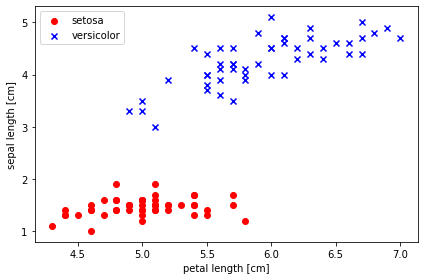

In [3]:
# ploting data to see linearly saperable or  not 

plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')

plt.xlabel('petal length [cm]')
plt.ylabel('sepal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# # plt.savefig('./iris_1.png', dpi=300)
plt.show()

In [4]:
# coding Perceptron

class Perceptron(object):
  
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta        # Step value , it will change by 0.01 for every iterations , thus eta is used and it is greek symbol
        self.n_iter = n_iter  # number of iterations

    def fit(self, X, y):    # fit function
        self.w_ = np.zeros(1 + X.shape[1]) # w0 will be a constant . w1 ... wn , X.shape[1] is input  , shape[1] is column , shape[0] is row 
        print(self.w_)
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0    # initalizing errors to 0
            for xi, target in zip(X, y):  
                update = self.eta * (target - self.predict(xi)) # update the value by eta times the target minus prediction
                self.w_[1:] += update * xi # update the weights 
                self.w_[0] += update #update the constant
                errors += int(update != 0.0) # increementing error value , will count no. of error prediction
            self.errors_.append(errors) # appending value to actual total list of  errors 
        return self

    def net_input(self, X):       
        return np.dot(X, self.w_[1:]) + self.w_[0] 
    # net input : x value with dot product of weights plus some constant value i.e. (x.w)+c
    
    def predict(self, X): # predict function : will check net intput
        return np.where(self.net_input(X) >= 0.0, 1, -1) #if sample  weight is above 0 , predict as 1 otherwise -1 , threshold value = 0.0

[0. 0. 0.]


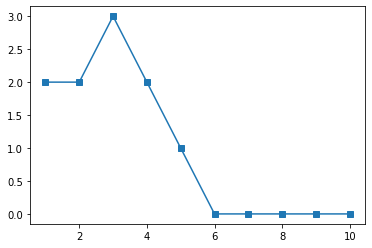

In [5]:
# creating perceptrnon

ppn = Perceptron(eta=0.01,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_,marker='s') # plotting errors 
plt.show()

In [6]:
def plot_dec_reg(X,y,classifier,resolution = 0.02):
    marker = ('s','o')
    colors = ('red','blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max = X[:,0].min(),X[:,0].max()
    x2_min,x2_max = X[:,1].min(),X[:,1].max()
    
    xx1 ,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    print(xx1)
    print(xx2)
    print(np.array([xx1.ravel(),xx2.ravel()]).T.shape)
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    print(Z)
    Z= Z.reshape(xx1.shape)
    print(Z)
    plt.contourf(xx1,xx2,Z,alpha = 0.3,cmap = cmap)
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    
    for i,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],c=colors[i],marker=marker[i],label=cl)


[[4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 ...
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]
 [4.3  4.32 4.34 ... 6.94 6.96 6.98]]
[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.02 1.02 1.02 ... 1.02 1.02 1.02]
 [1.04 1.04 1.04 ... 1.04 1.04 1.04]
 ...
 [5.04 5.04 5.04 ... 5.04 5.04 5.04]
 [5.06 5.06 5.06 ... 5.06 5.06 5.06]
 [5.08 5.08 5.08 ... 5.08 5.08 5.08]]
(27675, 2)
[-1 -1 -1 ...  1  1  1]
[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


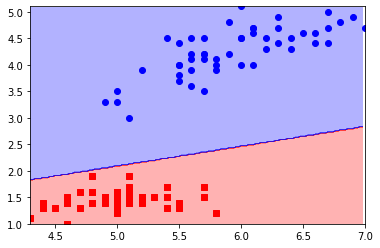

In [7]:
plot_dec_reg(X,y,classifier=ppn)